In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
import os
import random
import numpy as np
import matplotlib.pyplot as plt


os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [3]:
x_train = x_train.reshape(-1, 28,28) / 255.0
x_test = x_test.reshape(-1, 28,28)/ 255.0

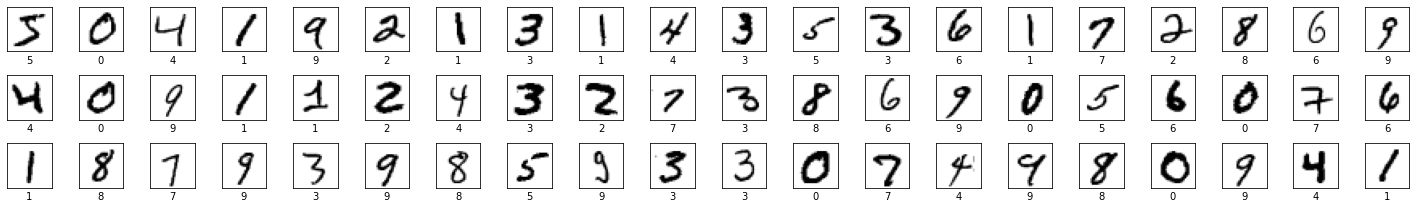

In [4]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

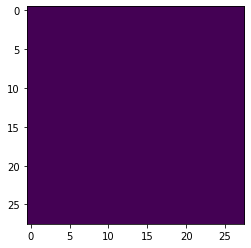

In [5]:
mean_img = np.mean(x_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [6]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28, 28, 1)),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(10),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 7, 96)          11712     
                                                                 
 activation (Activation)     (None, 7, 7, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 4, 4, 96)         384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 activation_1 (Activation)   (None, 4, 4, 256)         0

In [16]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [17]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 18s 21ms/step - loss: 0.1193 - accuracy: 0.9706 - val_loss: 0.1758 - val_accuracy: 0.9675
Epoch 2/5
657/657 [==============================] - 11s 17ms/step - loss: 0.0796 - accuracy: 0.9798 - val_loss: 0.1465 - val_accuracy: 0.9692
Epoch 3/5
657/657 [==============================] - 11s 16ms/step - loss: 0.0616 - accuracy: 0.9839 - val_loss: 0.1124 - val_accuracy: 0.9759
Epoch 4/5
657/657 [==============================] - 11s 16ms/step - loss: 0.0515 - accuracy: 0.9863 - val_loss: 0.1126 - val_accuracy: 0.9733
Epoch 5/5
657/657 [==============================] - 11s 16ms/step - loss: 0.0464 - accuracy: 0.9880 - val_loss: 0.1110 - val_accuracy: 0.9744


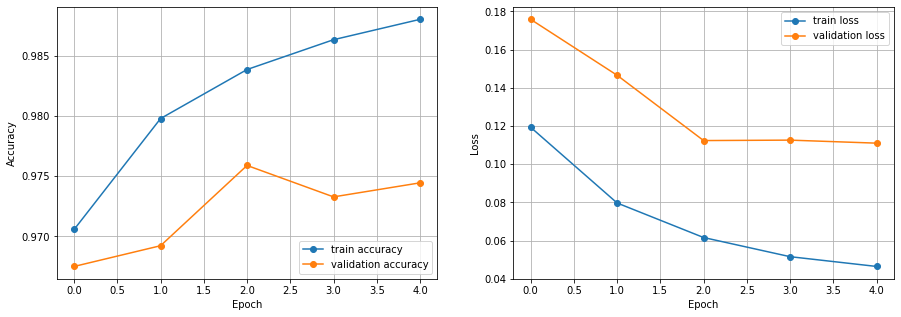

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [19]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [20]:
s = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 13s 17ms/step - loss: 0.0301 - accuracy: 0.9917 - val_loss: 0.0594 - val_accuracy: 0.9868
Epoch 2/5
657/657 [==============================] - 10s 15ms/step - loss: 0.0173 - accuracy: 0.9950 - val_loss: 0.0562 - val_accuracy: 0.9876
Epoch 3/5
657/657 [==============================] - 11s 17ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0546 - val_accuracy: 0.9876
Epoch 4/5
657/657 [==============================] - 10s 16ms/step - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.0537 - val_accuracy: 0.9879
Epoch 5/5
657/657 [==============================] - 10s 15ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 0.0522 - val_accuracy: 0.9881


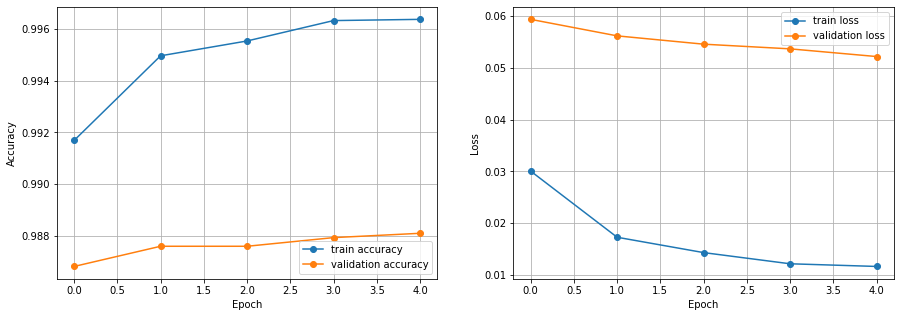

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(s.history['accuracy'], 'o-', label='train accuracy')
plt.plot(s.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(s.history['loss'], 'o-', label='train loss')
plt.plot(s.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [22]:
model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [23]:
r = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 15s 16ms/step - loss: 0.0238 - accuracy: 0.9932 - val_loss: 0.0866 - val_accuracy: 0.9814
Epoch 2/5
657/657 [==============================] - 10s 15ms/step - loss: 0.0225 - accuracy: 0.9940 - val_loss: 0.0950 - val_accuracy: 0.9811
Epoch 3/5
657/657 [==============================] - 10s 16ms/step - loss: 0.0207 - accuracy: 0.9945 - val_loss: 0.1005 - val_accuracy: 0.9806
Epoch 4/5
657/657 [==============================] - 10s 16ms/step - loss: 0.0204 - accuracy: 0.9946 - val_loss: 0.1092 - val_accuracy: 0.9798
Epoch 5/5
657/657 [==============================] - 10s 16ms/step - loss: 0.0162 - accuracy: 0.9960 - val_loss: 0.0859 - val_accuracy: 0.9847


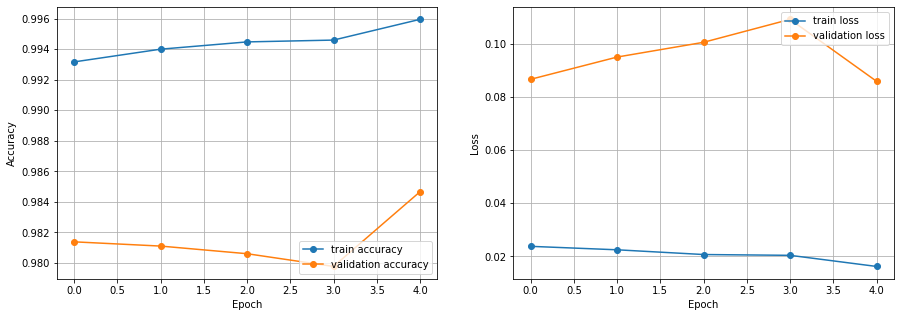

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(r.history['accuracy'], 'o-', label='train accuracy')
plt.plot(r.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(r.history['loss'], 'o-', label='train loss')
plt.plot(r.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()